# Heart-Machine-Learning-Project

# Problem

Ingin mengetahui apakah seseorang tersebut menderita penyakit jantung dilihat dari usia, jenis kelamin, dan tekanan darah pasien

# Goals

Dapat memprediksi seseorang tersebut menderita penyakit jantung apa tidak dilihat dari usia, jenis kelamin, tekanan darah, kolestrol, gula darah, dan beberapa variabel lainnya

# Describe Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.options.display.max_columns=999

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type (typical, asymptotic, nonanginal, nontypical)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

In [3]:
df.shape

(303, 14)

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / (len(df))) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', '%null', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,%null,unique,uniqueSample
0,age,int64,0,0.0,41,"[40, 41]"
1,sex,int64,0,0.0,2,"[0, 1]"
2,cp,int64,0,0.0,4,"[2, 1]"
3,trestbps,int64,0,0.0,49,"[114, 129]"
4,chol,int64,0,0.0,152,"[167, 261]"
5,fbs,int64,0,0.0,2,"[1, 0]"
6,restecg,int64,0,0.0,3,"[2, 1]"
7,thalach,int64,0,0.0,91,"[184, 169]"
8,exang,int64,0,0.0,2,"[1, 0]"
9,oldpeak,float64,0,0.0,40,"[0.7, 1.1]"


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Handling Outliers & Imbalance Data

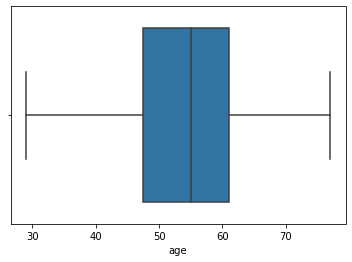

In [7]:
sns.boxplot(df.age)

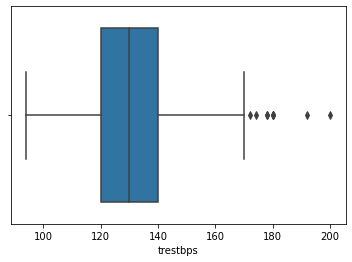

In [8]:
sns.boxplot(df.trestbps)

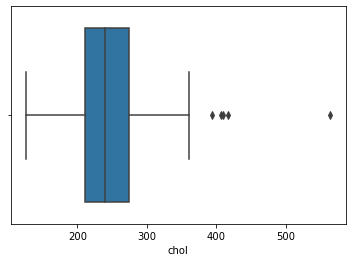

In [9]:
sns.boxplot(df.chol)

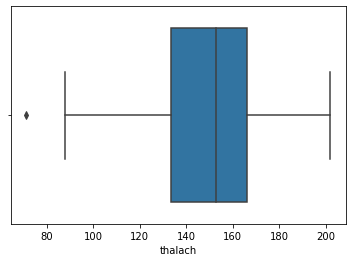

In [10]:
sns.boxplot(df.thalach)

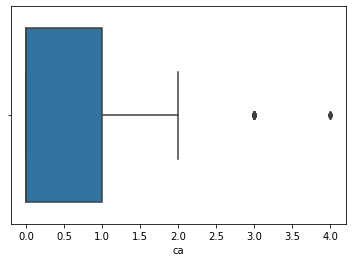

In [11]:
sns.boxplot(df.ca)

Dapat dilihat pada grafik, dalam beberapa variabel terlihat adanya data outliers

In [12]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Analysis

In [13]:
pd.crosstab(index=df.target, columns=df.age, margins = True)

age,29,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,76,77,All
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,3,2,3,2,3,2,3,3,4,2,6,5,6,10,12,9,8,7,7,6,4,4,3,6,2,1,3,0,0,0,1,138
1,1,2,2,2,2,3,1,9,7,5,8,6,4,3,4,3,4,9,9,6,10,3,5,7,7,5,3,1,4,3,6,4,4,3,2,2,1,3,1,1,0,165
All,1,2,4,2,3,4,3,10,8,8,11,8,7,5,7,5,7,12,13,8,16,8,11,17,19,14,11,8,11,9,10,8,7,9,4,3,4,3,1,1,1,303


Pada tabel dapat dilihat, jumlah pasien yang menderita penyakit jantung lebih banyak dibanding dengan yang tidak. Dan yang menderita penyakit jantung banyak diusia antara 35 - 67 tahun

In [14]:
pd.crosstab(index=df.target, columns=df.sex, margins = True)

sex,0,1,All
target,,,
0,24,114,138
1,72,93,165
All,96,207,303


Pada tabel dapat dilihat, jumlah pasien yang menderita penyakit jantung lebih banyak berjenis kelamin male dibandingkan yang female.

In [15]:
pd.crosstab(index=df.target, columns=df.trestbps, margins=True)

trestbps,94,100,101,102,104,105,106,108,110,112,114,115,117,118,120,122,123,124,125,126,128,129,130,132,134,135,136,138,140,142,144,145,146,148,150,152,154,155,156,160,164,165,170,172,174,178,180,192,200,All
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,0,0,0,0,2,11,4,1,0,1,2,14,1,1,4,7,2,6,0,13,5,3,1,2,3,15,1,2,4,1,1,8,3,1,0,0,6,1,1,3,0,1,1,2,1,1,138
1,2,2,1,2,1,3,1,4,8,5,0,3,0,5,23,3,0,2,4,1,6,1,23,3,2,5,1,10,17,2,0,1,1,1,9,2,0,1,1,5,0,0,1,1,0,1,1,0,0,165
All,2,4,1,2,1,3,1,6,19,9,1,3,1,7,37,4,1,6,11,3,12,1,36,8,5,6,3,13,32,3,2,5,2,2,17,5,1,1,1,11,1,1,4,1,1,2,3,1,1,303


pada tabel, pasien dengan penyakit jantung rata-rata memiliki tekanan darah normal - tinggi. Karena ukuran tekanan darah tinggi yaitu yang memiliki tekanan diatas 140 mmHg

In [16]:
pd.crosstab(index=df.target, columns=df.fbs, margins=True)

fbs,0,1,All
target,,,
0,116,22,138
1,142,23,165
All,258,45,303


tabel ini menunjukkan, bahwa pasien yang menderita penyakit jantung tidak ada hubungannya dengan gula darah puasa pasien

In [17]:
pd.crosstab(index=df.target, columns=df.thalach, margins=True)

thalach,71,88,90,95,96,97,99,103,105,106,108,109,111,112,113,114,115,116,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,177,178,179,180,181,182,184,185,186,187,188,190,192,194,195,202,All
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,2,2,1,2,2,2,2,1,2,1,1,1,1,3,0,1,1,1,5,3,1,1,1,3,2,6,1,1,2,0,1,1,4,3,4,3,5,3,3,3,0,0,5,0,2,1,2,2,3,1,3,1,4,2,3,2,1,2,1,0,2,2,1,1,0,2,2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,138
1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,2,1,0,0,0,1,3,1,0,2,1,0,0,0,1,2,1,1,0,0,1,2,1,2,0,2,4,2,1,1,2,3,2,2,4,6,2,3,2,3,4,3,3,5,3,8,7,1,3,2,1,3,4,4,3,7,6,3,3,0,5,5,2,1,4,1,1,2,1,1,1,1,1,0,1,165
All,1,1,1,1,2,1,1,2,3,1,2,2,3,2,1,3,3,2,1,1,3,1,4,2,1,7,4,1,1,1,4,4,7,2,1,2,1,3,2,6,3,6,7,7,4,4,5,3,2,7,4,8,3,5,4,6,5,6,4,9,5,11,9,2,5,3,1,5,6,5,4,7,8,5,3,1,5,5,2,2,5,1,1,2,1,1,1,1,1,1,1,303


tabel ini menunjukkan, bahwa pasien yang menderita penyakit jantung atau pun tidak, tidak mempengaruhi denyut nadi pasien

In [18]:
pd.crosstab(index=df.target, columns=df.exang, margins=True)

exang,0,1,All
target,,,
0,62,76,138
1,142,23,165
All,204,99,303


tabel ini menunjukkan bahwa pasien dengan penyakit jantung tidak menderita angina atau nyeri dada saat berolahraga

# Data Visalization

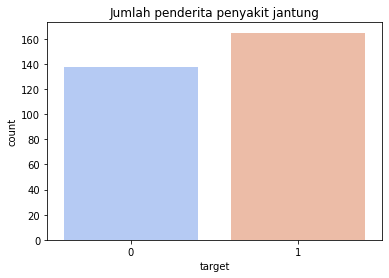

In [19]:
sns.countplot(df.target, palette='coolwarm')
plt.title('Jumlah penderita penyakit jantung')
plt.savefig('jumlah_penderita')
plt.show()

Pada grafik dapat dilihat, pada data lebih banyak yang menderita penyakit jantung

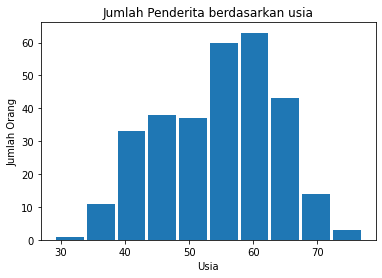

In [20]:
plt.hist(df.age, histtype='bar', rwidth = 0.9)
plt.xlabel('Usia')
plt.ylabel('Jumlah Orang')
plt.title('Jumlah Penderita berdasarkan usia')
plt.savefig('jumlah_usia')
plt.show()

Pada data, rata-rata usia responden berusia 30 - 70. dan terbanyak diusia 50 - < 70

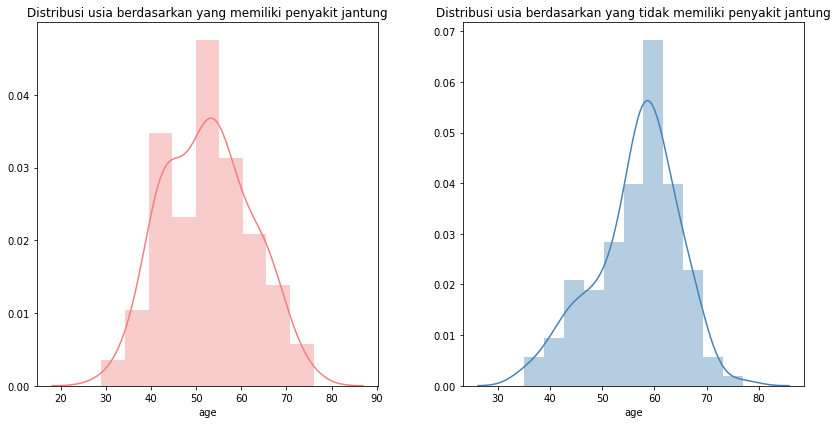

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(df[(df['target'] == 1)]["age"], color = "lightcoral")
plt.title('Distribusi usia berdasarkan yang memiliki penyakit jantung')

plt.subplot(122)
sns.distplot(df[(df['target'] == 0)]["age"], color = "steelblue")
plt.title('Distribusi usia berdasarkan yang tidak memiliki penyakit jantung')
plt.tight_layout()
plt.savefig('distribusi_usia')
plt.show()

Pada grafik terlihat, bahwa data terdistribusi normal. karena bentuknya mirip seperti lonceng

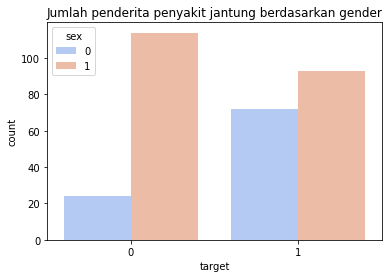

In [22]:
sns.countplot(df.target, hue = df.sex, palette='coolwarm')
plt.title('Jumlah penderita penyakit jantung berdasarkan gender')
plt.savefig('jumlah_gender')
plt.show()

Dapat dilihat, bahwa male lebih banyak yang mempunyai penyakit jantung dibandingkan yang tidak

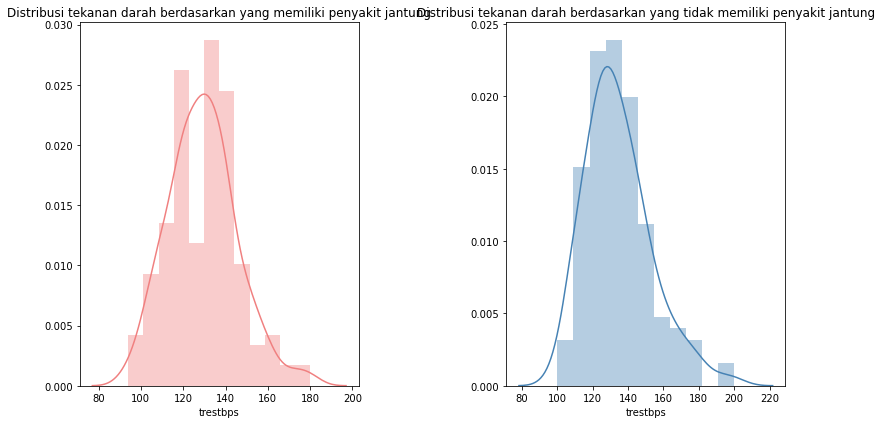

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(df[(df['target'] == 1)]["trestbps"], color = "lightcoral")
plt.title('Distribusi tekanan darah berdasarkan yang memiliki penyakit jantung')

plt.subplot(122)
sns.distplot(df[(df['target'] == 0)]["trestbps"], color = "steelblue")
plt.title('Distribusi tekanan darah berdasarkan yang tidak memiliki penyakit jantung')
plt.tight_layout()
plt.savefig('distribusi_tekanan_darah')
plt.show()

Berdasarkan tekanan darah juga terlihat bahwa data terdistribusi normal

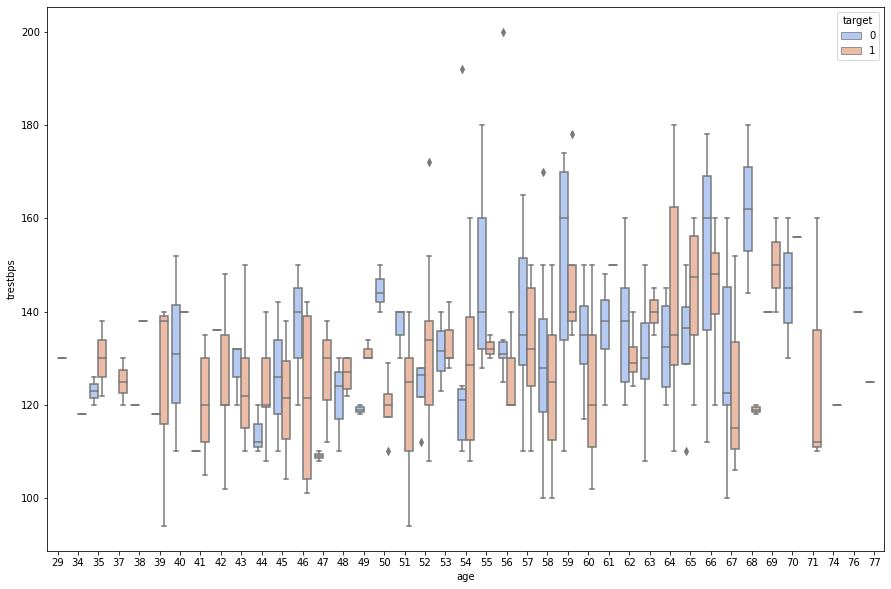

In [76]:
plt.figure(figsize=(15,10))
sns.boxplot(df.age, df.trestbps, hue=df.target, palette='coolwarm')
plt.savefig('usia_tekanandarah')
plt.show()

Pada data menunjukkan bahwa responden yang tidak memiliki penyakit jantung ada yang memiliki tekanan darah tinggi

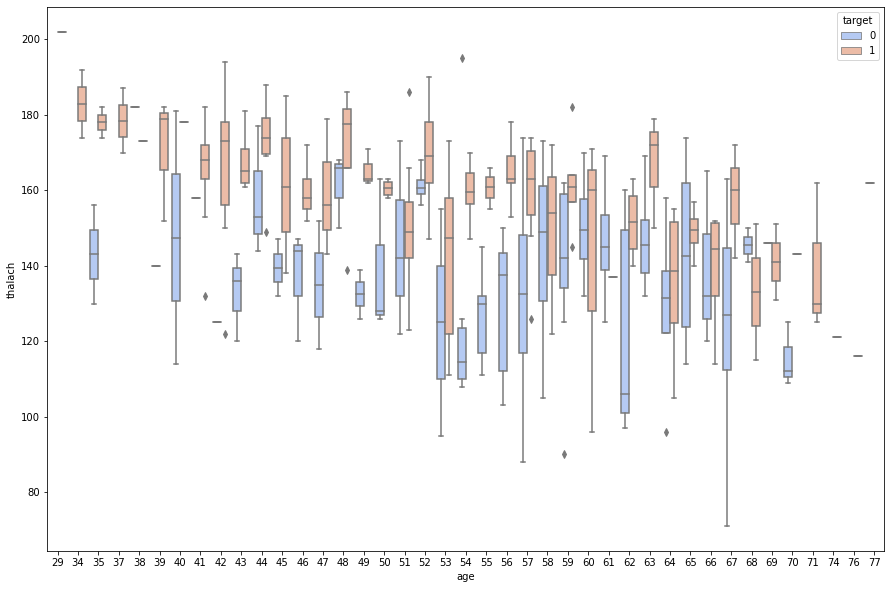

In [78]:
plt.figure(figsize=(15,10))
sns.boxplot(df.age, df.thalach, hue=df.target, palette='coolwarm')
plt.savefig('usia_nadi')
plt.show()

grafik menunjukkan bahwa responden dengan penyakit jantung memiliki denyut nadi yang tinggi

# Data Preprocessing, Feature Engineering & Feature Selection

Dilakukan scalling pada data agar memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya. dan digunakan robust scaler dikarenakan adanya data outliers pada beberapa variabel

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, precision_score, roc_auc_score, classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

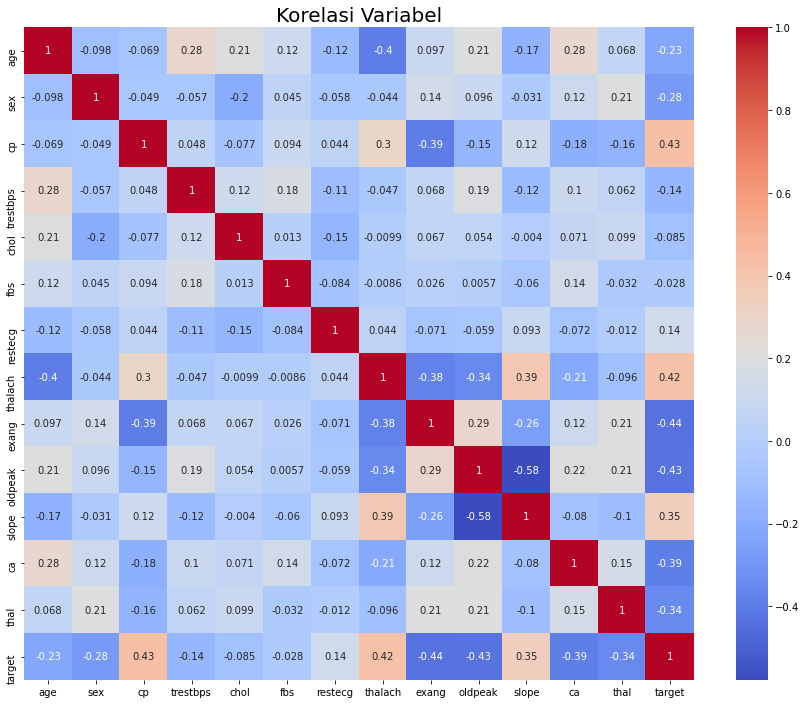

In [25]:
plt.figure(figsize=(15,12))
plt.title('Korelasi Variabel', size = 20)
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)
plt.savefig('Korelasi Variabel')
plt.show()

In [26]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

Variabel yang mempengaruhi target adalah variabel cp, thalach, dan slope

### Dataset Splitting

In [5]:
X = df.drop(columns="target")
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

### Scalling

In [6]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training Model, Hyperparameter Tuning, Evaluation Metrics

In [7]:
def evaluation_metrics(model, x_test, y_test):
    prediksi = model.predict(x_test)
    BA = balanced_accuracy_score(y_test, prediksi)
    F1 = f1_score(y_test, prediksi)
    RS = recall_score(y_test, prediksi)
    PS = precision_score(y_test, prediksi)
    CR = classification_report(y_test, prediksi)
    tp, fn, fp, tn = confusion_matrix(y_test, prediksi).ravel()
    print('Evaluation Metrics Model : ', model)
    print('True Positive : ', tp)
    print('True Negative : ', tn)
    print('False Positive : ', fp)
    print('False Negative : ', fn)
    print('\n')
    print('confusion_matrix : \n', confusion_matrix(y_test, prediksi))
    print('\n')
    print(f'Balance Accuracy: {round(BA, 3)}')
    print(f'F1 Score: {round(F1, 3)}')
    print(f'Recall Score: {round(RS, 3)}')
    print(f'Precision Score: {round(PS, 3)}')
    print(f'\n Classification Report : \n {CR}')
    val = dict()
    val['Balance Accuracy'] = BA
    val['F1 Score'] = F1
    val['Recall Score'] = RS
    val['Precision Score'] = PS
    val['Classification Report'] = CR
    return val

## DEFAULT with all features

### LogisticRegression

In [8]:
LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)

LogRegScore = evaluation_metrics(LogReg, X_test, y_test)

Evaluation Metrics Model :  LogisticRegression()
True Positive :  22
True Negative :  36
False Positive :  5
False Negative :  13


confusion_matrix : 
 [[22 13]
 [ 5 36]]


Balance Accuracy: 0.753
F1 Score: 0.8
Recall Score: 0.878
Precision Score: 0.735

 Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.63      0.71        35
           1       0.73      0.88      0.80        41

    accuracy                           0.76        76
   macro avg       0.77      0.75      0.75        76
weighted avg       0.77      0.76      0.76        76



### KNN

In [9]:
KNN = KNeighborsClassifier()

KNN.fit(X_train, y_train)

KNNScore = evaluation_metrics(KNN, X_test, y_test)

Evaluation Metrics Model :  KNeighborsClassifier()
True Positive :  21
True Negative :  36
False Positive :  5
False Negative :  14


confusion_matrix : 
 [[21 14]
 [ 5 36]]


Balance Accuracy: 0.739
F1 Score: 0.791
Recall Score: 0.878
Precision Score: 0.72

 Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.60      0.69        35
           1       0.72      0.88      0.79        41

    accuracy                           0.75        76
   macro avg       0.76      0.74      0.74        76
weighted avg       0.76      0.75      0.74        76



### RandomForest

In [10]:
RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)

RFCScore = evaluation_metrics(RFC, X_test, y_test)

Evaluation Metrics Model :  RandomForestClassifier()
True Positive :  23
True Negative :  38
False Positive :  3
False Negative :  12


confusion_matrix : 
 [[23 12]
 [ 3 38]]


Balance Accuracy: 0.792
F1 Score: 0.835
Recall Score: 0.927
Precision Score: 0.76

 Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.66      0.75        35
           1       0.76      0.93      0.84        41

    accuracy                           0.80        76
   macro avg       0.82      0.79      0.79        76
weighted avg       0.82      0.80      0.80        76



### XGBoost

In [11]:
XGB = XGBClassifier()

XGB.fit(X_train, y_train)

XGBScore = evaluation_metrics(XGB, X_test, y_test)

Evaluation Metrics Model :  XGBClassifier()
True Positive :  21
True Negative :  35
False Positive :  6
False Negative :  14


confusion_matrix : 
 [[21 14]
 [ 6 35]]


Balance Accuracy: 0.727
F1 Score: 0.778
Recall Score: 0.854
Precision Score: 0.714

 Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.60      0.68        35
           1       0.71      0.85      0.78        41

    accuracy                           0.74        76
   macro avg       0.75      0.73      0.73        76
weighted avg       0.74      0.74      0.73        76



## Hyperparameter Tuning

### LogisticRegression

In [34]:
param_LogReg = {
    "C" : [1.0, 2.0, 3.0],
    "random_state" : [None, 42],
    "max_iter" : [100, 200, 300]
}

In [35]:
best_LogReg = GridSearchCV(LogisticRegression(), param_LogReg, cv=5, verbose=1, n_jobs=-1)
best_LogReg.fit(X_train, y_train)
print(best_LogReg.score(X_test, y_test))
print(best_LogReg.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.8s


0.7631578947368421
{'C': 1.0, 'max_iter': 100, 'random_state': None}


[Parallel(n_jobs=-1)]: Done  83 out of  90 | elapsed:    7.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.2s finished


In [36]:
best_LogReg = best_LogReg.best_estimator_

In [37]:
auc_LogReg = roc_auc_score(y_test, best_LogReg.predict(X_test))
auc_LogReg

0.7533101045296167

In [38]:
LogReg_best = evaluation_metrics(best_LogReg, X_test, y_test)

Evaluation Metrics Model :  LogisticRegression()
True Positive :  22
True Negative :  36
False Positive :  5
False Negative :  13


confusion_matrix : 
 [[22 13]
 [ 5 36]]


Balance Accuracy: 0.753
F1 Score: 0.8
Recall Score: 0.878
Precision Score: 0.735

 Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.63      0.71        35
           1       0.73      0.88      0.80        41

    accuracy                           0.76        76
   macro avg       0.77      0.75      0.75        76
weighted avg       0.77      0.76      0.76        76



### KNN

In [39]:
param_KNN = {
    'n_neighbors': np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17]),
    'p': [1, 2],
}

In [40]:
best_KNN = GridSearchCV(KNeighborsClassifier(), param_KNN, cv=5, verbose=1, n_jobs=-1)
best_KNN.fit(X_train, y_train)
print(best_KNN.score(X_test, y_test))
print(best_KNN.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7894736842105263
{'n_neighbors': 5, 'p': 1}


[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  83 out of  90 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.7s finished


In [41]:
best_KNN = best_KNN.best_estimator_

In [42]:
auc_KNN = roc_auc_score(y_test, best_KNN.predict(X_test))
auc_KNN

0.7797909407665505

In [43]:
KNN_best = evaluation_metrics(best_KNN, X_test, y_test)

Evaluation Metrics Model :  KNeighborsClassifier(p=1)
True Positive :  23
True Negative :  37
False Positive :  4
False Negative :  12


confusion_matrix : 
 [[23 12]
 [ 4 37]]


Balance Accuracy: 0.78
F1 Score: 0.822
Recall Score: 0.902
Precision Score: 0.755

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.66      0.74        35
           1       0.76      0.90      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.80      0.79      0.79        76



### RandomForest

In [18]:
param_RFC = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 20, 50, 80],
    'max_features': ['auto', 0.3, 0.6, 0.8],
    'min_samples_leaf': [1, 5, 10]
}

In [19]:
best_RFC = GridSearchCV(RandomForestClassifier(), param_RFC, cv=5, verbose=1, n_jobs=-1)
best_RFC.fit(X_train, y_train)
print(best_RFC.score(X_test, y_test))
print(best_RFC.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  8.3min finished


0.7763157894736842
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 250}


In [20]:
best_RFC = best_RFC.best_estimator_

In [21]:
auc_RFC = roc_auc_score(y_test, best_RFC.predict(X_test))
auc_RFC

0.767595818815331

In [22]:
RFC_best = evaluation_metrics(best_RFC, X_test, y_test)

Evaluation Metrics Model :  RandomForestClassifier(max_depth=20, n_estimators=250)
True Positive :  23
True Negative :  36
False Positive :  5
False Negative :  12


confusion_matrix : 
 [[23 12]
 [ 5 36]]


Balance Accuracy: 0.768
F1 Score: 0.809
Recall Score: 0.878
Precision Score: 0.75

 Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.75      0.88      0.81        41

    accuracy                           0.78        76
   macro avg       0.79      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



### XGBoost

In [56]:
param_XGB = {
    'max_depth': [3, 6, 10],
    'colsample_bytree': [0.4, 0.6, 0.8, 1],
    'n_estimators': [100, 150, 200],
    'subsample': [0.4, 0.6, 0.8],
    'gamma': [1, 5, 10],
    'learning_rate': [0.01, 0.1, 1],
    'reg_alpha': [0.01, 0.1, 10],
    'reg_lambda': [0.01, 0.1, 10]
}

In [57]:
best_XGB = GridSearchCV(XGBClassifier(), param_XGB, cv=3, verbose=1, n_jobs=-1)
best_XGB.fit(X_train, y_train)
print(best_XGB.score(X_test, y_test))
print(best_XGB.best_params_)

Fitting 3 folds for each of 8748 candidates, totalling 26244 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 16302 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 18148 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 20646 tasks  

0.7236842105263158
{'colsample_bytree': 0.6, 'gamma': 5, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0.1, 'reg_lambda': 10, 'subsample': 0.6}


In [58]:
best_XGB = best_XGB.best_estimator_

In [59]:
auc_XGB = roc_auc_score(y_test, best_XGB.predict(X_test))
auc_XGB

0.7167247386759582

In [60]:
XGB_best = evaluation_metrics(best_XGB, X_test, y_test)

Evaluation Metrics Model :  XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=1, n_estimators=150,
              reg_alpha=0.1, reg_lambda=10, subsample=0.6)
True Positive :  22
True Negative :  33
False Positive :  8
False Negative :  13


confusion_matrix : 
 [[22 13]
 [ 8 33]]


Balance Accuracy: 0.717
F1 Score: 0.759
Recall Score: 0.805
Precision Score: 0.717

 Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.63      0.68        35
           1       0.72      0.80      0.76        41

    accuracy                           0.72        76
   macro avg       0.73      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



# Perbandingan Model

### Model Default

In [64]:
BA_default = [LogRegBest['Balance Accuracy'], KNNScore['Balance Accuracy'], RFCScore['Balance Accuracy'], XGBScore['Balance Accuracy']]

F1_default = [LogRegScore['F1 Score'], KNNScore['F1 Score'], RFCScore['F1 Score'], XGBScore['F1 Score']]

RS_default = [LogRegScore['Recall Score'], KNNScore['Recall Score'], RFCScore['Recall Score'], XGBScore['Recall Score']]

PS_default = [LogRegScore['Precision Score'], KNNScore['Precision Score'], RFCScore['Precision Score'], XGBScore['Precision Score']]

best_model = pd.DataFrame({'BalanceAccuracy_default': BA_default,
                          "F1Score_default" : F1_default,
                          "RecallScore_default": RS_default,
                          "PrecisionScore_default" : PS_default},
                           index = "LogisticRegression,KNN,RandomForest,XGBoost".split(','))

In [65]:
best_model["BalanceAccuracy_default"] = round(best_model["BalanceAccuracy_default"], 2)
best_model["F1Score_default"] = round(best_model["F1Score_default"], 2)
best_model["RecallScore_default"] = round(best_model["RecallScore_default"], 2)
best_model["PrecisionScore_default"] = round(best_model["PrecisionScore_default"], 2)

In [66]:
best_model

,BalanceAccuracy_default,F1Score_default,RecallScore_default,PrecisionScore_default
LogisticRegression,0.75,0.80,0.88,0.73
KNN,0.74,0.79,0.88,0.72
RandomForest,0.81,0.84,0.90,0.79
XGBoost,0.73,0.78,0.85,0.71


### Model Hyperparameter Tuning

In [67]:
BA_H = [LogReg_best['Balance Accuracy'], KNN_best['Balance Accuracy'], RFC_best['Balance Accuracy'], XGB_best['Balance Accuracy']]

F1_H = [LogReg_best['F1 Score'], KNN_best['F1 Score'], RFC_best['F1 Score'], XGB_best['F1 Score']]

RS_H = [LogReg_best['Recall Score'], KNN_best['Recall Score'], RFC_best['Recall Score'], XGB_best['Recall Score']]

PS_H = [LogReg_best['Precision Score'], KNN_best['Precision Score'], RFC_best['Precision Score'], XGB_best['Precision Score']]

best_model2 = pd.DataFrame({'BalanceAccuracy_H': BA_H,
                          "F1Score_H" : F1_H,
                          "RecallScore_H": RS_H,
                          "PrecisionScore_H" : PS_H},
                           index = "LogisticRegression,KNN,RandomForest,XGBoost".split(','))

In [68]:
best_model2["BalanceAccuracy_H"] = round(best_model2["BalanceAccuracy_H"], 2)
best_model2["F1Score_H"] = round(best_model2["F1Score_H"], 2)
best_model2["RecallScore_H"] = round(best_model2["RecallScore_H"], 2)
best_model2["PrecisionScore_H"] = round(best_model2["PrecisionScore_H"], 2)

In [69]:
best_model2

,BalanceAccuracy_H,F1Score_H,RecallScore_H,PrecisionScore_H
LogisticRegression,0.75,0.80,0.88,0.73
KNN,0.78,0.82,0.90,0.76
RandomForest,0.77,0.81,0.88,0.75
XGBoost,0.72,0.76,0.80,0.72


balance accuracy tertinggi ada pada model RandomForest dengan parameter default. model tersebut yang akan saya gunakan untuk machine learning

# Kesimpulan dan Saran

**Kesimpulan**
- Lebih dari 50% dari data, menderita penyakit jantung
- Jenis kelamin laki-laki lebih berisiko terkena penyakit jantung
- Usia lebih tua juga lebih rentan terkena penyakit jantung
- Pasien dengan tekanan darah tinggi, belum tentu memiliki penyakit jantung
- Pasien dengan denyut nadi yang tinggi kemungkinan memiliki penyakit jantung
- Digunakan model randomforest karena memiliki score balance accuracy tertinggi

**Saran**
- Kemungkinan dapat menambah beberapa feature lainnya, dikarenakan penyakit jantung tidak akurat jika dilihat dari features-features yang ada
- Kemungkinan dapat menambahkan feature genetik, uji stress, penyakit sistemik lainnya, merokok, konsumsi alkohol, BMI
- Untuk pemeriksaan menggunakan machine ini kemungkinan diperlukan alat lain, karena adanya pemeriksaan tekanan darah, kolestrol, ekg, dan lain-lain

# Import Model

In [39]:
import joblib

In [37]:
filename = "model.sav"

In [41]:
joblib.dump(RFC, filename)

['model.sav']

**Test by random data**

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
RFC.predict_proba([[55,1,2,130,245,1,0,140,0,2.0,0,0,1]])[0]

array([0.47, 0.53])

pasien kemungkinan akan memiliki penyakit jantung